**Group 18 Project Proposal**

*Title: Diabetes Data*

**Introduction:** Diabetes is classified by hemoglobin A1c (a component of blood) levels that are equal to or greater than 6.5%. Research shows higher Body Mass Index (BMI) and blood glucose levels to often be good indicators of diabetes (Patel et al., 2023).

**Question:** Can we predict a patient's diabetes diagnosis based on their blood glucose level (*mg/dL*) and BMI (*kg/m2)?

Our data set comes from Kaggle and explores diabetes diagnosis (regardless of type) in a sample of several hundred rural African-American patients. We use data from the columns “height”(*in*), “weight”(*lbs*), “stab.glu”(blood glucose, *mg/dl*) and “glyhb”(hemoglobin A1c, *%*) and wrangle it for our algorithm. 
https://www.kaggle.com/datasets/imtkaggleteam/diabetes 

**References:**
Patel, B. J., Mehta, D. N., Vaghani, A., & Patel, K. (2023). Correlation of Body Mass Index (BMI) with Saliva and Blood Glucose Levels in Diabetic and Non-Diabetic Patients. Journal of pharmacy & bioallied sciences, 15(Suppl 2), S1204–S1207. https://doi.org/10.4103/jpbs.jpbs_159_23

**Preliminary exploratory data analysis:**
First, we install and load packages necessary for our proposal as well as further analysis. 

In [1]:
library(rvest)
library(tidyverse)
library(tidymodels)
install.packages("themis")
library(themis)
set.seed(0102)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed


We read in our dataset from Kaggle. 

In [2]:
URL <- 'https://raw.githubusercontent.com/wmma2/group_18_project/main/diabetes.csv'
raw_data <- read_csv(URL)
glimpse(raw_data)

Rows: 403 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): location, gender, frame
dbl (16): id, chol, stab.glu, hdl, ratio, glyhb, age, height, weight, bp.1s,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 403
Columns: 19
$ id       <dbl> 1000, 1001, 1002, 1003, 1005, 1008, 1011, 1015, 1016, 1022, 1…
$ chol     <dbl> 203, 165, 228, 78, 249, 248, 195, 227, 177, 263, 242, 215, 23…
$ stab.glu <dbl> 82, 97, 92, 93, 90, 94, 92, 75, 87, 89, 82, 128, 75, 79, 76, …
$ hdl      <dbl> 56, 24, 37, 12, 28, 69, 41, 44, 49, 40, 54, 34, 36, 46, 30, 4…
$ ratio    <dbl> 3.6, 6.9, 6.2, 6.5, 8.9, 3.6, 4.8, 5.2, 3.6, 6.6, 4.5, 6.3, 6…
$ glyhb    <dbl> 4.31, 4.44, 4.64, 4.63, 7.72, 4.81, 4.84, 3.94, 4.84, 5.78, 4…
$ location <chr> "Buckingham", "Buckingham", "Buckingham", "Buckingham", "Buck…
$ age      <dbl> 46, 29, 58, 67, 64, 34, 30, 37, 45, 55, 60, 38, 27, 40, 36, 3…
$ gender   <chr> "female", "female", "female", "male", "male", "male", "male",…
$ height   <dbl> 62, 64, 61, 67, 68, 71, 69, 59, 69, 63, 65, 58, 60, 59, 69, 6…
$ weight   <dbl> 121, 218, 256, 119, 183, 190, 191, 170, 166, 202, 156, 195, 1…
$ frame    <chr> "medium", "large", "large", "large", "medium", "large", "medi…
$ bp.1s    <dbl> 1

The dataset is already tidy. To make it suitable for our analysis, we create a categorical **diagnosis** column from the given *glyhb* column and a **BMI** (in *kg/m^2*) column using the *weight* and *height* columns. We filter out the rows with missing values as they are not significant to our dataset, and select the necessary columns: **stab.glu**, **BMI** and **diagnosis**. 

The data is now wrangled and suitable for our analysis. 

In [3]:
tidy_data <- raw_data |>
        mutate(diagnosis = if_else(glyhb >= 6.5, "yes", "no")) |>
        mutate(diagnosis = as_factor(diagnosis))|>
        mutate(height_m = height*0.0254, 
               weight_kg = weight*0.45359237,
               BMI = weight_kg/height_m^2) |>
        filter(!is.na(glyhb + BMI + stab.glu)) |>
        select(stab.glu, BMI, diagnosis)
head(tidy_data)

stab.glu BMI      diagnosis
1 82       22.13096 no       
2 97       37.41923 no       
3 92       48.37028 no       
4 93       18.63784 no       
5 90       27.82477 yes      
6 94       26.49935 no

We split the data for training and testing.  

In [4]:
data_split <- initial_split(tidy_data, prop = 0.75 , strata = diagnosis)
train_data <- training(data_split)
test_data <- testing(data_split)

train_count <- train_data|>
    group_by(diagnosis)|>
    summarize(count = n()) 

train_mean <- train_data|>
    summarize(stab.glu_mean = mean(stab.glu),
              BMI_mean = mean(BMI)) 

train_NAs <- sum(is.na(train_data))

train_count
train_mean
train_NAs

diagnosis count
1 no        240  
2 yes        47

stab.glu_mean BMI_mean
1 107.5714      28.91491

[1] 0

From the count tibble, we see that our data is uneven and needs to be upscaled when training our algorith. Our dataset has no missing values. The means also vary too much hinting at different distributions. To visualize, we plot our predictors:

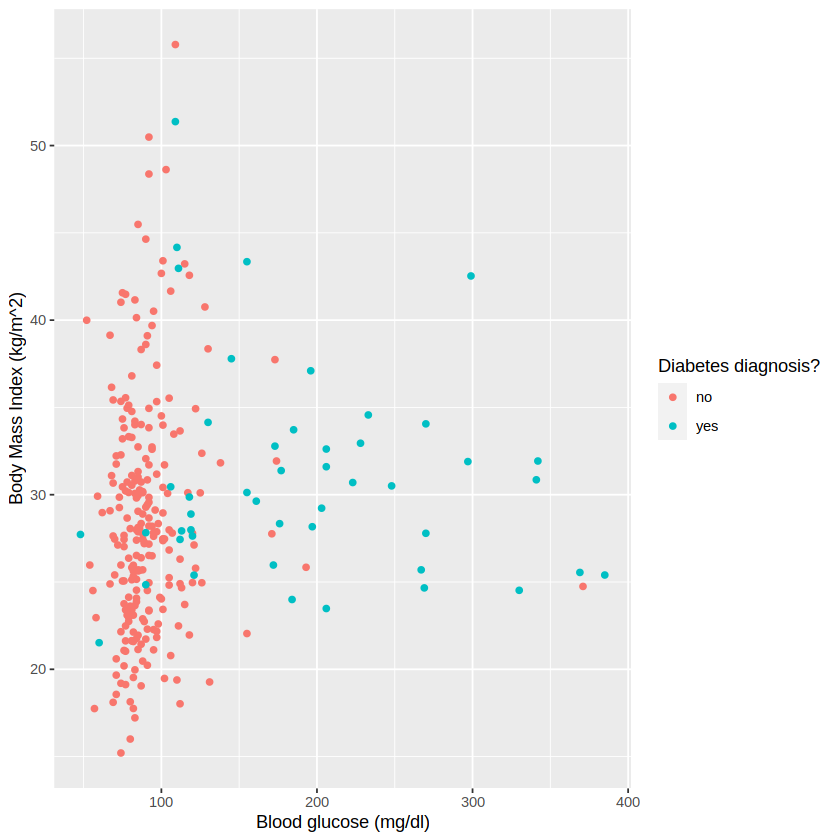

In [5]:
train_plot <- train_data |>
    ggplot(aes(x = stab.glu, y = BMI, colour = diagnosis)) +
    geom_point() +
    labs(x = "Blood glucose (mg/dl)", y = "Body Mass Index (kg/m^2)", colour = "Diabetes diagnosis?") 
train_plot

The scatterplot shows that blood glucose (stab.glu) is distributed on a larger scale, meaning it will have greater effect on our k-NN model. To counter this, we will standardize the predictors in our training data!

**Methods:**
We will be conducting our analysis by creating a the K-nearest neighbors classification algorithm. We will use the blood glucose level “stab.glu” and “BMI” (created from "height" and "weight" columns of the original dataset) columns as our predictors and “diagnosis” (created from "stab.glu" column) as our classification column. Our aim is to predict a patient’s diabetes diagnosis based on their blood glucose level and BMI. 

We will be visualizing our results using a scatter plot with Blood Glucose on the x-axis and BMI on the y-axis. The color of the points will determine if the patient has been diagnosed with Diabetes.  

**Expected outcomes and Significance:**
We expect African American patients with relatively higher levels of blood glucose levels and BMI to be classified with a diabetes diagnosis. The significance of our expected outcomes can encourage patients to use our algorithm as a preliminary examination tool before getting a hemoglobin test for diabetes.

Our analysis could lead to future questions such as, *"How do these trends compare to other ethnicities? Are BMI and stable blood glucose levels still good indicators?”*